# Groundwater Models 

Flow in porous media is a topic that appears in many branches of engineering and science, e.g., ground water hydrology, reservoir engineering, soil science, soil mechanics, and chemical engineering (filtration).
The aquifer, which is the porous medium domain of the hydrologist, or the oil reservoir, which is the porous medium of the petroleum engineer are typical examples. {numref}`aquifers` is a sketch of different aquifer classifications. 

```{figure} aquifers.png
---
width: 400px
name: aquifers
---
Aquifer Schematic
```
A confined aquifer (pressure aquifer) is one bounded above and below by impermeable formations.
In a well penetrating such an aquifer, the water level will rise above the base of the confining formation.
Water levels in wells that sample a certain aquifer define an imaginary surface called the piezometric surface.

An unconfined aquifer (water table aquifer; phreatic aquifer) is one with the water table as its upper boundary.
The classifications are important because the equations of motion are different in different kinds of aquifers.

## Storativity

Storativity of an aquifer is the relationship between changes in head within the aquifer and the quantity of water stored in the aquifer.  The dominant mechanism of storage is different for confined and unconfined aquifers. {numref}`storage` is a sketch depicting the storage process in a confined, and an unconfined aquifer.

```{figure} storage.png
---
width: 400px
name: storage
---
Storage Mechanisms 
```

In a confined aquifer the water is stored or released by compression and decompression of water and the solid matrix (like a sponge squeezed while wrapped in plastic wrap).  In an unconfined aquifer the water is stored or released from the pore space when the water table elevation changes.

The storage coefficient (confined) or specific yield (unconfined) is the volume of water added to (or removed from) storage per unit area of aquifer per unit change in head.  The usual symbols are $S$, and $S_y$.

## Permeability
Permeability is the material property that relates the resistance of flow through the porous medium to the hydraulic gradient.

## Head Loss Models

Darcy's law (a linear flux model) is the head loss model used for porous media flow.   

Darcy's law is usually presented as a discharge model

$$Q = -KA\frac{\Delta h}{\Delta x}$$

Expressed as a head loss model it is rearranged as

$$
h_L = \frac{QL}{KA}
$$
where $Q$ is the discharge in the aquifer, $L$ is the length in the flow direction, $A$ is the cross sectional area of aquifer (pore space and solid phase), $K$ is the hydraulic conductivity (sometimes called the permeability).

A more useful (for computation) form of the head loss model, is to express it (the loss equation) as an equation of motion as in 

$$Q = -KA\frac{\partial h}{\partial x}$$

where $- \frac{\partial h}{\partial x}$ is the hydraulic gradient (slope of the hydraulic grade line) in the aquifer.

{numref}`1D-aquifer-flow` is a diagram that illustrates the relationships expressed by Darcy's law.  


```{figure} 1D-aquifer-flow.png
---
width: 400px
name: 1D-aquifer-flow
---
Schematic diagram of unidirectional flow in a generic aquifer, showing heads in two measuring wells located distance $L$ apart
```
- The cross-sectional flow area, $A$, is the product of height of the aquifer block and its width (in this case the width is into the plane of the paper). 
- The distance between two measurement points is $L$. The head at the two points is $h_1$ and $h_2$.
- The gradient of head, $\frac{\partial h}{\partial x}$, is $\frac{h_2 - h_1}{L}$.
- The hydraulic gradient is  $- \frac{\partial h}{\partial x}$, is $\frac{h_1 - h_2}{L}$.

Finally Darcy's law (for the drawing) is $Q = K A \frac{h_1 - h_2}{L}$.

## Equilibrium Models

Equilibrium models imply that the head distribution is constant in time.

:::{note}
Steady-state is a common, thermodynamically incorrect way to refer to an equilibrium model.  Keep in mind, flow is non zero, hence the flow is steady, but the thermodynamic state of the system is not.  It's an almost trivial point - but relevant when the model is used for geochemistry explaination.
:::

## Confined Aquifer Flow Modeling Theory 

Using Figure {numref}`1D-aquifer-flow` as a starting point, one can develop a computational model of flow in a confined aquifer.
Let's decide that the distance $L$ in the figure is going to be divided into a series of connected, small blocks.
The flow direction in the figure will be declared  the $x$ direction, the depth into the drawing is declared the $y$ direction, and the height of the block is declared the $z$ direction.

{numref}`single-computational-cell` is a diagram of one such small block.

```{figure} single-computational-cell.png
---
width: 400px
name: single-computational-cell
---
Single computational cell definition sketch
```

Using this diagram we can now develop a set of expressions for the cell volume, solids volume in the cell,  pore volume in the cell (where water actually can flow), and solids mass.

First some definitional expressions for each cell:

> - Cell Volume: $V_{cell} = \Delta x \times \Delta y \times \Delta z$
> - Solids Volume: $V_{solid} =(1-\omega) \Delta x \times \Delta y \times \Delta z$
> - Void (Pore) Volume: $V_{pore} = \omega \Delta x \times \Delta y \times \Delta z$
> - Solids Mass: $M_{solid} = \rho_{s} (1-\omega) \Delta x \times \Delta y \times \Delta z$

Next write a mass balance for water in the cell;

$$
\frac{d M_{water}}{dt} = M_{Inflow} - M_{Outlfow}
$$

The left side of the expression is simply the storage term, and in the context of storage coefficients and aquifer head is replaced by

$$
{\frac{d M_{water}}{dt}\mid}_{cell} =\rho_{w} S_{s} \Delta x \Delta y \Delta z \frac{\partial h_i}{\partial t}
$$

where $h_i$ is the head in the $i-$th cell.  
 
The right hand side of the expression is based on writing Darcy's law for the cell, and using values in adjacent (hydraulically connected) cells.

{numref}`multiple-computational-cell` is a diagram of three such connected blocks.

```{figure} multiple-computational-cell.png
---
width: 400px
name: multiple-computational-cell
---
Multiple computational cell definition sketch
```

The $i-$th cell is the cell of interest, the cell to the left is cell ID $i-1$, and the cell to the right is cell ID $i+1$.  

We now write Darcy's law for each face of cell $i$, treating the head in each of the cell centers as if they were the sampling wells of {numref}`1D-aquifer-flow` (In the context of {numref}`1D-aquifer-flow`, the cell face is halfway between the two wells; the cell centers are at the wells.)

Darcy's law for the left face is 

$$
M_{Inflow} = Q_{left} =\rho_{w} K \Delta y \Delta z \frac{h_{i-1} - h_{i}}{\Delta x}
$$
 
Similarly for the right face, 

$$
M_{Outflow} = Q_{right} =\rho_{w} K \Delta y \Delta z \frac{h_{i} - h_{i+1}}{\Delta x}
$$

Now combine these together in the mass balance

$$
\rho_{w} S_{s} \Delta x \Delta y \Delta z \frac{\partial h_i}{\partial t} = 
(\rho_{w} K \Delta y \Delta z \frac{h_{i-1} - h_{i}}{\Delta x}) - 
(\rho_{w} K \Delta y \Delta z \frac{h_{i} - h_{i+1}}{\Delta x})
$$

Next divide by the water density $\rho_{w}$,

$$
S_{s} \Delta x \Delta y \Delta z \frac{\partial h_i}{\partial t} = 
(K \Delta y \Delta z \frac{h_{i-1} - h_{i}}{\Delta x}) - 
(K \Delta y \Delta z \frac{h_{i} - h_{i+1}}{\Delta x})  
$$

Then divide by cell width $\Delta y $,

$$
S_{s} \Delta x \Delta z \frac{\partial h_i}{\partial t} = 
(K  \Delta z \frac{h_{i-1} - h_{i}}{\Delta x}) - 
(K  \Delta z \frac{h_{i} - h_{i+1}}{\Delta x})
$$

Rewrite the right hand side into gradient of head form

$$
S_{s} \Delta x \Delta z \frac{\partial h_i}{\partial t} = 
(K \Delta z \frac{h_{i+1} - h_{i}}{\Delta x}) - 
(K \Delta z \frac{h_{i} - h_{i-1}}{\Delta x})
= 
{K \Delta z \frac{\partial h}{\partial x}}\mid_{i~\rightarrow i+1} -
{K \Delta z \frac{\partial h}{\partial x}}\mid_{i-1~\rightarrow i}
$$

Divide by cell distance, $\Delta x$,

$$
S_{s}  \Delta z \frac{\partial h_i}{\partial t} = 
\frac{{K \Delta z \frac{\partial h}{\partial x}}\mid_{i~\rightarrow i+1} -
{K \Delta z\frac{\partial h}{\partial x}}\mid_{i-1~\rightarrow i}}{\Delta x}
$$

Take limit as $\Delta x~\rightarrow0$, 

$$
S_{s} \Delta z  \frac{\partial h}{\partial t} = 
\frac{\partial}{\partial x}({K \Delta z \frac{\partial h}{\partial x}})
$$

Finally, stipulate that $S_{s} \Delta z = S$, the storage coefficient (for confined aquifer), and define the aquifer transmissivity as $K \Delta z = T$ and we have performed a nicely back-handed way to get the partial differential equation of aquifer flow.  

$$
S \frac{\partial h}{\partial t} = 
\frac{\partial}{\partial x}({T \frac{\partial h}{\partial x}})
$$

## Solution Methods

Ironically, the analysis actually provides an algorithm to approximate head in the aquifer 

### Finite-Difference Methods -- 1 Spatial Dimension
Here we will use the equation obtained after dividing by the water density as a starting point for simulating aquifer behavior.   

As a first model, lets consider the steady flow situation, in which case the left hand side vanishes (there is no change in storage).

$$
0 = 
(K \Delta y \Delta z \frac{h_{i-1} - h_{i}}{\Delta x}) - 
(K \Delta y \Delta z \frac{h_{i} - h_{i+1}}{\Delta x})
$$

Next we will use the arithmetic mean values of the material properties ($K$) at the cell interfaces, so the difference equation becomes

:::{note}
Other spatial averaging formulas are employed, but the arithmetic mean is quite common
:::

$$
0 = 
(\frac{1}{2}(K_{i-1}+K_{i}) \Delta y \Delta z \frac{h_{i-1} - h_{i}}{\Delta x}) - 
(\frac{1}{2}(K_{i}+K_{i-1}) \Delta y \Delta z \frac{h_{i} - h_{i+1}}{\Delta x})
$$

Now lets group some constants:

$$
\begin{matrix}
A_{i} = \frac{1}{2 \Delta x}(K_{i-1}+K_{i}) \Delta y \Delta z \\
B_{i} = \frac{1}{2 \Delta x}(K_{i}+K_{i+1}) \Delta y \Delta z
\end{matrix}
$$

Now substitute into the difference equation

$$
0 = A_{i}(h_{i-1}) -(A_{i}+B_{i})(h_{i}) + B_{i}(h_{i+1})
$$

Now all that remains is to specify boundary conditions, and then implement an algorithm to solve the resulting system of algebraic equations.

:::{note}
I have assumed that the spatial step, $\Delta x$ is the same for each cell -- it doesn't have to be, but relaxing that assumption complicates the specifications of the constants $A$ and $B$.
:::

Some of the plausible boundary conditions are:
1. Specified head boundary (pretty easy to specify in a computer representation).
2. Zero-flux boundary (also easy to specify using the cell-centered formulation herein).
3. Specified flux boundary (using a modeling trick not too hard to specify).

These three types of conditions should handle the majority of practical situations where one would need to model an aquifer system.

Lets examine the difference equation a little bit -- assume we have the correct values then

$$
h_{i} = \frac{A_{i}(h_{i-1}) + B_{i}(h_{i+1})}{(A_{i}+B_{i})}
$$

which suggests a nice algorithm. 

We will simply apply boundary conditions, then evaluate the expression for each cell, and after we compute the expression for all the cells, we will repeat the process until the solution stops changing.  

Computationally, we are employing a Jacobi iteration scheme, which will work nicely for this particular problem structure.  
An alternative, equally valid, would be to construct the linear system of equations (in this case it will be a three-banded matrix), and apply an appropriate row reduction technique to find the solution. 

The example 1D applications are presented below as special cases of 2D models.

### Finite-Difference Methods -- 2 Spatial Dimensions

If we perform an analysis in the same way as we did to arrive at 

$$
S \frac{\partial h}{\partial t} = 
\frac{\partial}{\partial x}({T \frac{\partial h}{\partial x}})
$$

except now include another direction (the y-direction) we will have an aquifer in two spatial
dimensions. The governing equation becomes

$$
S \frac{\partial h}{\partial t} = 
\frac{\partial}{\partial x}({T_x \frac{\partial h}{\partial x}}) +
\frac{\partial}{\partial y}({T_y \frac{\partial h}{\partial y}})
$$

The meanings of the terms are the same, except the transmissivity terms now have
subscripts to indicate they can have different values depending on direction

Then as before we will construct the difference-equation model from a multiple-cell
balance model of the aquifer at a cell of interest, then extend the equations to cover
the entire model domain.

```{figure} 2D-cell.png
---
width: 400px
name: 2D-cell
---
Plan view schematic of 2-dimensional multiple cell balance computational stencil.
```

{numref}`2D-cell` is a plan view schematic of a aquifer with flow to be computed in two
directions (x and y). The cell indexing convention in the sketch is that rows are in-
dexed by the letter j and columns are indexed by the letter i. This naming convention
is arbitrary; in some instances it may be preferable to reverse the convention. The
schematic also shows the assumed flow directions; for column i, flows are upward in
the drawing, and for row j, flows are from left to right. If indeed the opposite is true
for a given set of boundary conditions and material properties, then the flows will be
computed as negative numbers – hence the convention here is that “positive flow” is
right and up.

As in the one-dimensional development the storage term is

$$
\frac{dM_{water}}{dt}\mid_cell = \rho_w S_s \Delta x \Delta y \Delta z \frac{\partial h_{i,j}}{\partial t} (218)
$$

where $h_{i,j}$ is the head in the (i−th, j−th) cell.

The mass flows **entering** the (i−th, j−th) cell are:

$$
M_{Inflow} = Q_{left} + Q_{bottom} = \rho_w K_x\Delta y\Delta z \frac{h_{i−1,j} − h_{i,j}}{∆x} + \rho_w K_y \Delta x \Delta z \frac{h_{i,j−1} − h_{i,j}}{\Delta y}
$$

The mass flows **leaving** the (i − th, j − th} cell are:

$$
M_{Outflow} = Q_{right} + Q_{top} = \rho_w K_x\Delta y\Delta z \frac{h_{i,j} − h_{i+1,j}}{\Delta x} + \rho_w K_y \Delta x \Delta z \frac{h_{i,j} − h_{i,j+1}}{\Delta y} 
$$

Now write the entire balance equation

$$
\rho_w S_s \Delta x \Delta y \Delta z \frac{\partial h_{i,j}}{\partial t}=
[\rho_w K_x\Delta y\Delta z \frac{h_{i−1,j} − h_{i,j}}{∆x} + \rho_w K_y \Delta x \Delta z \frac{h_{i,j−1} − h_{i,j}}{\Delta y}]−[\rho_w K_x\Delta y\Delta z \frac{h_{i,j} − h_{i+1,j}}{\Delta x} + \rho_w K_y \Delta x \Delta z \frac{h_{i,j} − h_{i,j+1}}{\Delta y} ]
$$

Next replace $S_s \Delta z$ with the storage coefficient $S$, and the $K_{x,y}\Delta z$ with the transmissivity T_{x,y} terms, and divide by the density of the fluid and the cell plan view area
$\Delta x \Delta y$ to obtain a more compact form of the difference equation.

$$
S \frac{\partial h_{i,j}}{\partial t} = [ \frac{1}{\Delta x} T_x \frac{h_{i−1,j} − h_{i,j}}{\Delta x}
+ \frac{1}{\Delta y} T_y \frac{h_{i,j-1} − h_{i,j}}{\Delta y}]-[\frac{1}{\Delta x} T_x \frac{h_{i,j} − h_{i+1,j}}{\Delta x} + \frac{1}{\Delta y} T_y \frac{h_{i,j} − h_{i,j+1}}{\Delta y}]
$$

As in the one-dimensional case, lets again consider steady flow (we will do transient
flows later on)

$$
0 = [ \frac{1}{\Delta x} T_x \frac{h_{i−1,j} − h_{i,j}}{\Delta x}
+ \frac{1}{\Delta y} T_y \frac{h_{i,j-1} − h_{i,j}}{\Delta y}]-[\frac{1}{\Delta x} T_x \frac{h_{i,j} − h_{i+1,j}}{\Delta x} + \frac{1}{\Delta y} T_y \frac{h_{i,j} − h_{i,j+1}}{\Delta y}]
$$

Also as in the one-dimensional case, we will approximate the spatial variation of the
material properties (transmissivity) as arithmetic mean values between two cells, so
making the following definitions:

$$
A_{i,j} = \frac{1}{2∆x^2} (T_{x,(i−1,j)} + T_{x,(i,j)})\\
B_{i,j} = \frac{1}{2∆x^2} (T_{x,(i,j)} + T_{x,(i+1,j)})\\
C_{i,j} = \frac{1}{2∆y^2} (T_{y,(i,j−1)} + T_{y,(i,j)})\\
D_{i,j} = \frac{1}{2∆y^2} (T_{y,(i,j)} + T_{y,(i,j+1)})\\
$$

Substitution into the difference equation yields

$$
0 = A_{i,j} h_{i−1,j} + B_{i,j} h_{i+1,j} − (A_{i,j} + B_{i,j} + C_{i,j} + D_{i,j} )h_{i,j} + C_{i,j} h_{i,j−1} + D_{i,j} h_{i,j+1}
$$

As before we can explicitly write the cell equation for hi,j as

$$
h_{i,j} = \frac{A_{i,j} h_{i−1,j} + B_{i,j} h_{i+1,j} + C_{i,j} h_{i,j−1} + D_{i,j} h_{i,j+1}}{A_{i,j} + B_{i,j} + C_{i,j} + D_{i,j} } 
$$

This difference equation represents an approximation to the governing flow equation,
the accuracy depending on the cell size. Boundary conditions are applied directly into
the analogs (another name for the difference equations) at appropriate locations on
the computational grid. Also as in the one-dimensional case we can generate solutions
either by iteration or solving the resulting linear system.

### Homebrew - Example 1

**2D Steady Flow in a Confined Aquifer using Jacobi Iteration**
We will start the example with a simple physical condition and use Jacobi iteration to obtain a solution. We will also incorporate two kinds of boundary conditions (fixed head, and no-flow boundaries).

:::{note}
Jacobi iteration for large domain problems (say 200x200) or bigger, is pretty inefficient – better iterative methods are available; however they simply represent clever changes to the basic iteration methods explained here, hence Jacobi is a good place to start, and is incredibly easy to program.
:::

```{figure} 2D-aquifer.png
---
width: 400px
name: 2D-aquifer
---
Plan view schematic of 2-dimensional multiple cell balance computational stencil.
```

{numref}`2D-aquifer` is a schematic of this example. The right panel of the figure shows the index naming convention. The known material properties are transmissivity (in each direction, at each cell center, and the thickness of the aquifer (b == ∆z). 
Our task is to simulate the aquifer with the 5 x 5 model shown. The left and right boundaries will be treated as specified head boundaries. The upper and lower boundary will be treated as no flow boundaries.
The head on the left is 100 meters and the right is 60 meters (same as before). The transmissivity ($K_{x,y}\Delta z=10$) square meters per second for this exampls suppose $K = 0.2$ meters per second, and $\Delta z = 50$ meters. The
spatial dimensions are $\Delta x = 100$ meters and $\Delta y = 100$ meters

The listing below implements the method – in this case there are data read/write methods (to read and build matrices), and notice how the no-flow boundary conditions are implemented.

The data are stored in an input file to generalize the script

**input1.txt** contents:
```
100
100
50
5
5
1e-4
100
100 200 300 400 500
100 200 300 400 500
100 100 100 100 60
100 100 100 100 60
100 100 100 100 60
100 100 100 100 60
100 100 100 100 60
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
0.2 0.2 0.2 0.2 0.2
```

In [188]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 1))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input1.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")
# first and last row special == no flow boundaries
    for jcol in range(ncols):
        head [0    ][jcol ] = head[1][jcol ]
        head [nrows-1][jcol ] = head[nrows-2][jcol ]
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 31
End Calculations
Iterations    =  31
Closure Error =  0.0
Head Map
----
0 [100.  90.  80.  70.  60.]
1 [100.  90.  80.  70.  60.]
2 [100.  90.  80.  70.  60.]
3 [100.  90.  80.  70.  60.]
4 [100.  90.  80.  70.  60.]
----


### Homebrew - Example 2

**2D Vertical Slice in a Confined Aquifer using Jacobi Iteration with Low Permeability Inclusion**
{numref}`lowKinclusion` is a schematic of a different situation that now only requires us to change
the contents of the data file, and re-run the scripts unchanged. 

```{figure} lowKinclusion.png
---
width: 400px
name: lowKinclusion
---
Plan view schematic of 2-dimensional multiple cell balance computational stencil.
```
The input file is listed below. The boundary conditions are still directly coded into the algorithm, and that would be a useful modification to the code - general boundary condition information.  Another useful addition is to generate graphical output, as the model size increases the output is harder to interpret - a contour map would be quite useful!

**input2.txt** contents
```
1
10
1
13
23
1e-9 
9000
5 15 25 35 45 55 65 75 85 95 105 115 125 135 145 155 165 175 185 195 205 215 225
0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 12.5
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
```

In [189]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input2.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")
# first and last row special == no flow boundaries
    for jcol in range(ncols):
        head [0    ][jcol ] = head[1][jcol ]
        head [nrows-1][jcol ] = head[nrows-2][jcol ]
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 7972
End Calculations
Iterations    =  7972
Closure Error =  0.0
Head Map
----
0 [100.     99.758  99.513  99.259  98.995  98.715  98.417  98.098  97.755
  97.383  96.9    96.329  95.729  95.167  94.674  94.159  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
1 [100.     99.758  99.513  99.259  98.994  98.715  98.416  98.097  97.755
  97.383  96.9    96.329  95.728  95.167  94.674  94.158  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
2 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.383  96.9    96.329  95.727  95.166  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
3 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.385  96.901  96.329  95.726  95.164  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
4 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.387  96

Now when you run the script, it seems to take a long time and many iterations. This
observation is indeed correct – the ratio of conductivity terms and spatial discretiza-
tion exerts a lot of influence on how fast the script can find a solution. This problem
exists for most iterative methods. One could use linear solver packages,
and simply solve the linear system without regard to structure, but assembly of the system matrix is non-trivial.  The head “array” would need to be addressed as a vector (we can use pointers to accomplish this task — not too hard, but we would need to build the coefficient matrix, solve the system, and de-construct the result).

## Generalizing the Boundary Conditions

In the prior examples the boundary conditions for the problems were kind of glossed
over. We applied a fixed head boundary on the left and right edges of the rectangular
domain, and zero-flux boundary at the top and bottom edges. A useful improvement
is to allow the user to choose which type by supplying information in the input file. I
find the easiest way (as we are just learning) is to assume the entire model is always
surrounded by a constant head condition and use a mask to tell the program when
that is not true.

The code fragments for making this change are pretty straightforward, and are dis-
played in the listing below. We need to read in boundary indicators for the top, bottom,
left, and right boundaries. Then convert them into numeric values for later. Here I
choose to use a zero to indicate a zero-flux boundary and any non-zero (usually a 1)
to indicate a fixed head boundary.

Next we apply the conditions within the solver loop by assigning the compued value
of the adjacent cell (either above, below, left, or right as appropriate). The remainder
of the script is unchanged, of course we need to include the new input values in the
data file - I chose to insert the boundary mask just before the head array read.

**input2GB** contents
```
1
10
1
13
23
1e-5 
9000
5 15 25 35 45 55 65 75 85 95 105 115 125 135 145 155 165 175 185 195 205 215 225
0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 12.5
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 90
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 0.0001 0.0001 0.0001 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
```

In [199]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input2GB.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 7972
End Calculations
Iterations    =  7972
Closure Error =  0.0
Head Map
----
0 [100.     99.758  99.513  99.259  98.995  98.715  98.417  98.098  97.755
  97.383  96.9    96.329  95.729  95.167  94.674  94.159  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
1 [100.     99.758  99.513  99.259  98.994  98.715  98.416  98.097  97.755
  97.383  96.9    96.329  95.728  95.167  94.674  94.158  93.617  93.053
  92.468  91.866  91.252  90.628  90.   ]
2 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.383  96.9    96.329  95.727  95.166  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
3 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.385  96.901  96.329  95.726  95.164  94.674  94.158  93.617  93.052
  92.468  91.866  91.251  90.628  90.   ]
4 [100.     99.758  99.513  99.259  98.994  98.714  98.416  98.097  97.754
  97.387  96

## Contour Plotting

This is really a separate topic, but its a useful way to view output, so we will just append some code here.

In [200]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

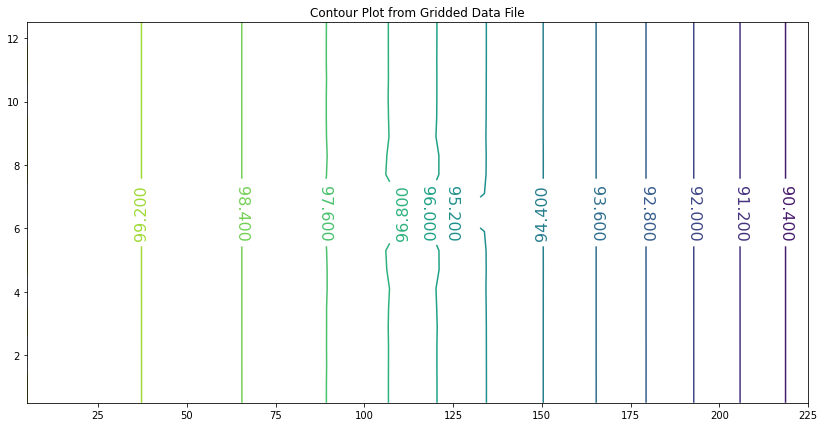

In [201]:
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 45)
lat = numpy.linspace(min(coord_y), max(coord_y), 21)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

Addition of the generalized boundary conditions, and contour plotting expands the utility of our script as illustrated in the next example.

### Homebrew - Example 3: Pore Pressure under a Dam

{numref}`sheetpile1` is a schematic of a dam built upon a permeable ground layer 80 meters thick (segment A to I). 

```{figure} sheetpile1.png
---
width: 400px
name: sheetpile1
---
Schematic of a dam on permeable soil with the sheet pile curtain underneath the dam.
```

The dam has a base 60 meters wide (segment B to F), with an upstream water depth of 10 meters. The downstream side of the dam is at 0 meters depth (otherwise its not a very good dam!). A sheetpile cutoff wall is installed beneath the dam (segment C to D to U to E). The ground layer has a hydraulic conductivity of K = 1 × 10−4 meters per second.

Important engineering questions are what is the pore water pressure under the dam, and is what is the total seepage under the dam? The pore water pressure can be found by solving for heads under the dam then subtracting the elevation of the computation location relative to a datum. The flow is found by Darcy’s law applied under the dam (shown as locations 1,2,3,4, and 5 in the sketch), which in turn requires computation of head under the dam. Thus the questions are answered by finding the head distribution under the dam.

The flow field (mathematically) extends an infinite distance upstream and downstream, but as a practical matter the contribution to seepage far upstream of the dam is negligible, and hence is approximated by the finite domain depicted.

Using the tools we have already built we can simply build an input file, run our
script and determine the head distribution (and thus compute the discharges under
the dam. There are two ways to conceptualize the model domain, we will examine both.

The first is to represent the domain as shown, and make the following specifications
in the boundary condition information, and we will treat the sheetpile cutoff wall
as a low permeability inclusion (much like the the prior example). The boundary
conditions are:

1. The segment from A to B is a constant head boundary with value equal to 10.
2. The segment from B to F is a zero-flux boundary.
3. The segment from B to C to D to U to E to F should be treated as a zero-flux boundary, but our mask does not extend into the interior – however the sheetpile itself can be approximated by providing a very small permeability. Alternately we could (should) modify the code to handle interior boundaries – but that is outside the scope of this chapter.
4. The segment from F to G is a constant head boundary with value equal to 0.
5. The segment form G to H is a constant head boundary with value equal to 0.
6. The segment from H to I is a zero-flux boundary.
7. The segment from I to A is a constant head boundary with value equal to 10.

**input3.txt** contents
```
10
10
1
9
31
1e-12
5000
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300
80 70 60 50 40 30 20 10 0
1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.00010
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0000001 0.0000001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.00010
```

In [197]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input3.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 519
End Calculations
Iterations    =  519
Closure Error =  0.0
Head Map
----
0 [10.    10.    10.    10.    10.    10.    10.    10.    10.    10.
 10.    10.     8.819  8.595  8.593  1.414  1.412  1.187  0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.   ]
1 [10.     9.977  9.954  9.928  9.899  9.866  9.826  9.777  9.715  9.633
  9.512  9.3    8.819  8.595  8.593  1.414  1.412  1.187  0.705  0.492
  0.371  0.289  0.228  0.18   0.141  0.109  0.082  0.058  0.037  0.018
  0.   ]
2 [10.     9.956  9.91   9.86   9.803  9.738  9.661  9.567  9.451  9.305
  9.116  8.868  8.562  8.372  8.37   1.638  1.636  1.446  1.139  0.891
  0.703  0.557  0.443  0.35   0.275  0.212  0.16   0.114  0.073  0.036
  0.   ]
3 [10.     9.936  9.87   9.798  9.717  9.623  9.512  9.379  9.217  9.019
  8.778  8.493  8.189  7.959  7.957  2.051  2.05   1.82   1.515  1.231
  0.991  0.795  0.635  0.504  0.396  0.306

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

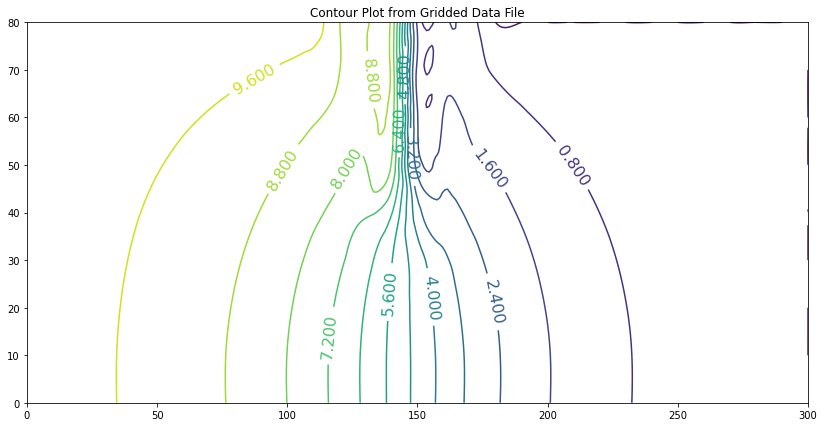

In [198]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

If we apply Darcy’s law to the portion in the vertical direction (where flow
must be vertical to seep under the dam) the result is about $3.76 m^3$ per day, per
meter of width. 

This example (like most roll-your-own) requires some specific knowledge of hydraulics
to interpret the results, in this case knowing to apply Darcy’s law along the bottom
of the reservoir to determine the flow rate, and to integrate (sum up) the individual
cell flows to obtain total flow.

### Homebrew - Example 4 : Pore Pressure under a Dam (Domain Decomposition approach)

The second way to solve this example, and perhaps better is to take advantage of
the symmetry and cut the domain in half, as in {numref}`sheetpile2`. 

```{figure} sheetpile2.png
---
width: 400px
name: sheetpile2
---
Schematic of a dam on permeable soil with the sheet pile curtain underneath the dam.
```
In this method we can actually specify the sheetpile as a boundary, and we will obtain the same results, but
only need to supply half as much input data.

In [195]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input4.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 412
End Calculations
Iterations    =  412
Closure Error =  0.0
Head Map
----
0 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
1 [10.     9.975  9.949  9.921  9.889  9.853  9.811  9.761  9.701  9.632
  9.552  9.466  9.384  9.329  9.329]
2 [10.     9.951  9.9    9.845  9.783  9.712  9.629  9.531  9.413  9.274
  9.111  8.928  8.742  8.602  8.602]
3 [10.     9.93   9.856  9.776  9.687  9.584  9.463  9.319  9.147  8.939
  8.69   8.393  8.056  7.734  7.734]
4 [10.     9.911  9.818  9.717  9.604  9.473  9.32   9.137  8.916  8.647
  8.316  7.9    7.353  6.544  5.   ]
5 [10.     9.896  9.788  9.67   9.538  9.385  9.206  8.992  8.733  8.416
  8.026  7.538  6.913  6.088  5.   ]
6 [10.     9.886  9.767  9.637  9.492  9.325  9.127  8.891  8.607  8.26
  7.835  7.313  6.672  5.895  5.   ]
7 [10.     9.881  9.756  9.621  9.469  9.293  9.087  8.84   8.543  8.181
  7.741  7.207  6.566  5.82   5.   ]
8 [10.     9.881

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

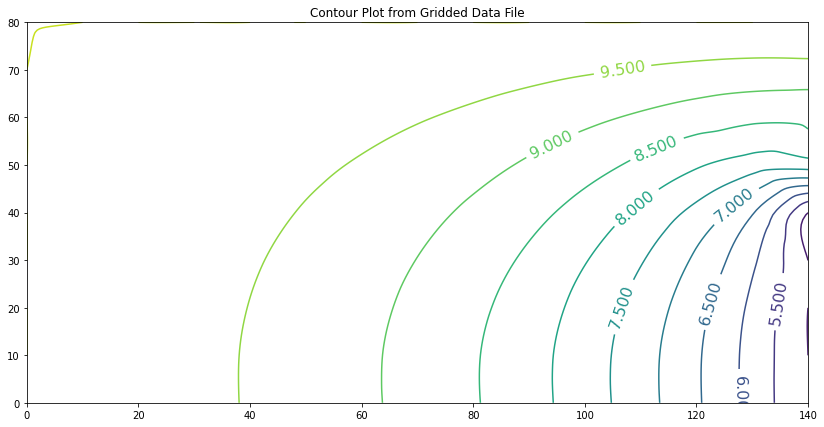

In [196]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

If we repeat the flow calculations, this time along the portion at the bottom of the sheetpile, we obtain nearly the same result, $3.74 m^3$ per day, per meter of width. 

This second way of solving the problem is far more correct because we didn’t have to choose
an artificial value to mimic the effect of the sheetpile

The next concept is to illustrate a means to approximate the effect of a
localized source (recharge or an injection well) or sink (pumping well). To incorporate
these kinds of inputs we add terms to the governing equation as

$$
S \frac{\partial h}{\partial t} = 
\frac{\partial}{\partial x}({T_x \frac{\partial h}{\partial x}}) +
\frac{\partial}{\partial y}({T_y \frac{\partial h}{\partial y}}) + R - Q
$$

where R and Q are recharge and pumping expressed in dimensions of $\frac{L^3}{T}$.

The resulting difference equation is

$$ S \frac{\partial h_{i,j}}{\partial t} = [ \frac{1}{\Delta x} T_x \frac{h_{i−1,j} − h_{i,j}}{\Delta x} + \frac{1}{\Delta y} T_y \frac{h_{i,j-1} − h_{i,j}}{\Delta y}]-[\frac{1}{\Delta x} T_x \frac{h_{i,j} − h_{i+1,j}}{\Delta x} + \frac{1}{\Delta y} T_y \frac{h_{i,j} − h_{i,j+1}}{\Delta y}] + \frac{R_{i,j}}{\Delta x \Delta y} - \frac{Q_{i,j}}{\Delta x \Delta y}$$

At equilibrium the time derivative vanishes and we have

$$ 0 = [ \frac{1}{\Delta x} T_x \frac{h_{i−1,j} − h_{i,j}}{\Delta x} + \frac{1}{\Delta y} T_y \frac{h_{i,j-1} − h_{i,j}}{\Delta y}]-[\frac{1}{\Delta x} T_x \frac{h_{i,j} − h_{i+1,j}}{\Delta x} + \frac{1}{\Delta y} T_y \frac{h_{i,j} − h_{i,j+1}}{\Delta y}] + \frac{R_{i,j}}{\Delta x \Delta y} - \frac{Q_{i,j}}{\Delta x \Delta y}$$

These additions are incorporated into our program by only adding a few code fragments in certain places. The next listing shows the various added components to handle a well field. Observe we can incorporate recharge as if it were a well with a negative pumping rate so for this document it is not considered separately, although in many
practical cases that might be a preferable way to incorporate the process.

:::{note}
To clarify, we are entering net pumping which is $R-Q$ as a single value for each cell.
:::

### Homebrew - Example 5: Wells in a rectangular aquifer 

{numref}`4wells-confined`  is a rectangular aquifer with 4 wells as shown. 

```{figure} 4wells-confined.png
---
width: 400px
name: 4wells-confined
---
Confined rectangular aquifer with 4 wells.
```

The aquifer thickness is 1 meters. The aquifer is surrounded with a constant head boundary of 30 meters. The hydraulic conductivity is $K = 0.033$ m/day. Using a 10 meter × 10 meter grid spacing estimate the pumping rate in each well so that the head within the rectangular area defined by the well field is no smaller than 15 meters.

The script is modified to read an additional net pumping array just after the $K_{x,y}$ terms.

The input file is a bit more complex because of its growing size; as the input requirements become substantial, one would write separate scripts just to build input files to structure them properly. 

:::{note}
We are essentially constructing a specialized database, and manually building that database can become tedious whereas we can automatically populate portions of the database with a script.
:::

**input5.txt** contents
```
10
10
1
28
28
1e-9
5000
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.430 0.000 0.000 0.000 0.000 0.430 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.430 0.000 0.000 0.000 0.000 0.430 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
```

The script is listed below:

In [217]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input5.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
#writearray(head)
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondx)
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondy)
pumping = [] # empty list
for irow in range(nrows):
        pumping.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
qrat = [[0 for j in range(ncols)] for i in range(nrows)]
## Transmissivity Arrays
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
## Net Pumping Array
for irow in range(nrows):
    for jcol in range(ncols):
        qrat[irow][jcol] = (-1*pumping[irow][jcol]) /(deltax*deltay)
## Headold array
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force a new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=(qrat[irow][jcol] 
                              +amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
# special messaging to report min head to adjust pump rates
import numpy
b = numpy.array(head)
print("Minimum Head",round(b.min(),3))
#
print("Head Map")
print("----")
writearray(head)
print("----")


Exit iterations in velocity potential because tolerance met 
Iterations = 806
End Calculations
Iterations    =  806
Closure Error =  0.0
Minimum Head 15.09
Head Map
----
0 [30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
1 [30.    29.914 29.828 29.743 29.659 29.577 29.499 29.426 29.36  29.303
 29.258 29.225 29.206 29.202 29.211 29.235 29.271 29.318 29.374 29.436
 29.503 29.572 29.643 29.715 29.787 29.858 29.929 30.   ]
2 [30.    29.827 29.655 29.484 29.315 29.15  28.992 28.844 28.71  28.595
 28.502 28.436 28.398 28.389 28.409 28.457 28.531 28.627 28.74  28.867
 29.002 29.143 29.286 29.43  29.574 29.716 29.858 30.   ]
3 [30.    29.74  29.481 29.223 28.968 28.717 28.476 28.248 28.042 27.864
 27.721 27.619 27.56  27.547 27.579 27.654 27.769 27.918 28.094 28.29
 28.497 28.711 28.928 29.145 29.361 29.575 29.788 30.   ]
4 [30.    29.653 29.306 28.96  28.615 28.275 27.945 27.632 27.346 27.098
 26.899 26.757 26.677 26.66  26.705

Then the contour plot

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

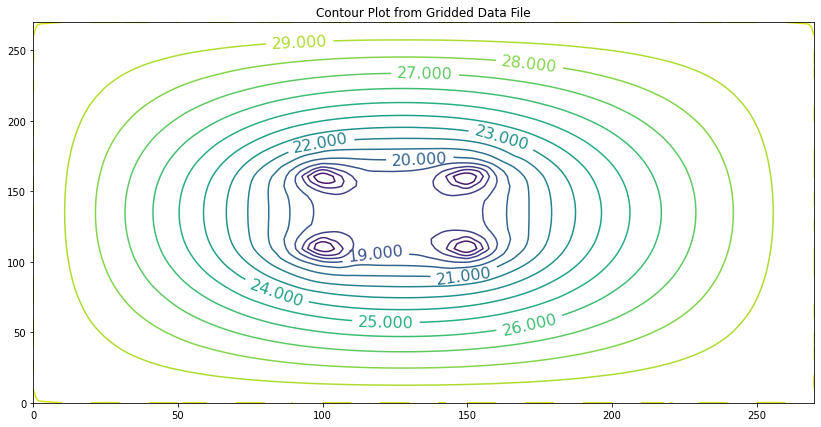

In [220]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 15)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

The contour plot shows the “cone of depression” around the well field. The script has an added message that reports the smallest head, and that report was used to adjust the pumping rates at the four wells until the value is close to the prescribed 15 meters.

The value for a single well is $0.430 m^3/day$ (using the units of hydraulic conductivity as a guide). If the goal was then to specify particular pumps, that flow value and the required lift would be used to specify and purchase pumps for the system. We will repeat the problem in the next section of the workbook, except the aquifer
will be unconfined — we expect different results, but will be able to re-use the input file.

## Unconfined Aquifer Flow

Unconfined aquifer flow is simply a replacement of the transmissivity term by the product of saturated thickness and hydraulic conductivity.

$$
S \frac{\partial h}{\partial t} = 
\frac{\partial}{\partial x}({K_x \bar h \frac{\partial h}{\partial x}}) +
\frac{\partial}{\partial y}({K_y \bar h \frac{\partial h}{\partial y}}) + R - Q
$$

As a difference equation it becomes

$$ 
S \frac{\partial h_{i,j}}{\partial t} = [ \frac{1}{\Delta x} K_x \bar h \frac{h_{i−1,j} − h_{i,j}}{\Delta x} + \frac{1}{\Delta y} K_y \bar h \frac{h_{i,j-1} − h_{i,j}}{\Delta y}]-[\frac{1}{\Delta x} K_x \bar h \frac{h_{i,j} − h_{i+1,j}}{\Delta x} + \frac{1}{\Delta y} K_y \bar h \frac{h_{i,j} − h_{i,j+1}}{\Delta y}] + \frac{R_{i,j}}{\Delta x \Delta y} - \frac{Q_{i,j}}{\Delta x \Delta y}
$$

Using the same spatial variation scheme we have

$$
A_{i,j} = \frac{1}{2∆x^2} (K_{x,(i−1,j)} h_{i−1,j} + K_{x,(i,j)} h_{i−1,j})\\
B_{i,j} = \frac{1}{2∆x^2} (K_{x,(i,j)} h_{i,j} + K_{x,(i+1,j)} h_{i+1,j})\\
C_{i,j} = \frac{1}{2∆y^2} (K_{y,(i,j−1)} h_{i,j-1} + K_{y,(i,j)} h_{i,j})\\
D_{i,j} = \frac{1}{2∆y^2} (K_{y,(i,j)} h_{i,j} + K_{y,(i,j+1)} h_{i,j+1})\\
$$

As before we can explicitly write the cell equation for $h_{i,j}$, however the system
is non-linear so the A, B, C, D coefficients are themselves functions of the current cell
values.

This difference equation represents an approximation to the governing flow equation,
the accuracy depending on the cell size. Boundary conditions are applied directly
into the analogs (another name for the difference equations) at appropriate locations
on the computational grid. Also as in the one-dimensional case we can generate
solutions either by iteration or solving the resulting non-linear system. Fortunately
theses kinds of systems are pretty well conditioned and one can usually compute the
$A, B, C, D$ coefficients from the most recent value (in an iterative sense) of $h$ and
proceeds as if the system is linear and it usually eventually converges.

:::{note}
The approach here is called the variable transmissivity approach – as long as there is not too much curvature in the head distribution or dramatic changes in material properties in adjacent cells the Jacobi iteration method
already employed will function, albeit slowly compared to more elaborate methods. In this discourse
we are satisfied with these relatively primitive constructs, and more sophisticated approaches are
presented elsewhere.
:::

### Homebrew - Example 6: Wells in a rectangular unconfined aquifer
{numref}`4wells-unconfined` is a rectangular aquifer with 4 wells as shown – the drawing is identi-
cal to the previous example, except the aquifer is now an unconfined aquifer. 


The saturated thickness before the pumps are turned on is 30 meters. The aquifer is sur-
rounded with a constant head boundary of 30 meters. The hydraulic conductivity is
K = 0.033 m/day.

```{figure} 4wells-unconfined.png
---
width: 400px
name: 4wells-unconfined
---
Unconfined rectangular aquifer with 4 wells.
```

Using a 10 meter × 10 meter grid spacing estimate the pumping rate in each well
so that the head within the rectangular area defined by the well field is no less
than 15 meters. In this example, the pumping rates will be quite a bit larger because
the saturated thickness at the desired drawdown is 15 times larger that the previous
example.

The listing below  is a script that performs the indicated computations. Upon initial inspection it appears nearly identical to the confined flow script, except the $A, B, C, D$ computations are moved into the iteration loop, so they are updated after each iteration.

Observe that the $∆z$ value is still read into the script, but never used. We are being
somewhat lazy here; however it illustrates a code development protocol to re-use as
much code as possible until the program functions as desired, then we could go back
and delete unused components. I choose to retain the $∆z$ so I would only have to
change the input file pumping array and not create an entirely new input file structure.
As stated earlier, as the problems get big, we would write scripts that build the input
files before we run the computation engines.

**input6.txt** Relevant portion of the input file for the example. The remainder of
the file is unchanged from the previous example (hence the reason I retained the ∆z
variable).
```
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 9.710 0.000 0.000 0.000 0.000 9.710 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 9.710 0.000 0.000 0.000 0.000 9.710 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
```

In [249]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("input6.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
#writearray(head)
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondx)
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondy)
pumping = [] # empty list
for irow in range(nrows):
        pumping.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
qrat = [[0 for j in range(ncols)] for i in range(nrows)]
## Net Pumping Array
for irow in range(nrows):
    for jcol in range(ncols):
        qrat[irow][jcol] = (-1*pumping[irow][jcol]) /(deltax*deltay)
## Headold array
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force a new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")
## Transmissivity Arrays
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            amat[irow][jcol] = ((head[irow-1][jcol  ] * hydcondx[irow-1][jcol  ]+ head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
            bmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ]+ head[irow+1][jcol  ] * hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
            cmat[irow][jcol] = ((head[irow  ][jcol-1] * hydcondy[irow  ][jcol-1]+ head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
            dmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ]+ head[irow  ][jcol+1] * hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right

# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=(qrat[irow][jcol] 
                              +amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,5))
# special messaging to report min head to adjust pump rates
import numpy
b = numpy.array(head)
print("Minimum Head",round(b.min(),3))
#
print("Head Map")
print("----")
writearray(head)
print("----")


Exit iterations in velocity potential because tolerance met 
Iterations = 807
End Calculations
Iterations    =  807
Closure Error =  0.0
Minimum Head 15.054
Head Map
----
0 [30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
1 [30.    29.935 29.87  29.806 29.742 29.68  29.62  29.564 29.514 29.471
 29.436 29.411 29.396 29.393 29.4   29.418 29.446 29.482 29.525 29.572
 29.623 29.676 29.73  29.785 29.839 29.893 29.947 30.   ]
2 [30.    29.87  29.739 29.609 29.48  29.354 29.232 29.117 29.013 28.923
 28.851 28.799 28.769 28.762 28.778 28.815 28.873 28.948 29.036 29.135
 29.24  29.348 29.458 29.568 29.677 29.786 29.893 30.   ]
3 [30.    29.804 29.607 29.409 29.213 29.018 28.83  28.651 28.488 28.346
 28.232 28.15  28.104 28.093 28.119 28.179 28.271 28.39  28.53  28.684
 28.847 29.014 29.182 29.35  29.515 29.679 29.84  30.   ]
4 [30.    29.738 29.473 29.207 28.939 28.672 28.411 28.161 27.931 27.729
 27.567 27.451 27.385 27.371 27.4

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

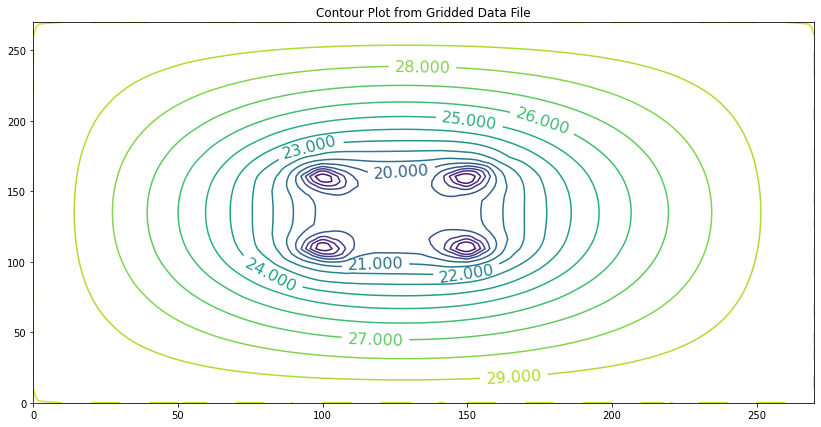

In [250]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 300)
lat = numpy.linspace(min(coord_y), max(coord_y), 80)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 15)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

The plot is practically
the same as in the previous example (in fact of the labels were not moved on the
contour lines, the figures would look identical) however the pumping rate is 20 times
larger for apparently the same head distribution — so if the dewatering effort were
in an unconfined aquifer, perhaps for an excavation for a foundation, choosing the
correct conditions would be kind of important.

## Interim Summary

As a quick summary of this chapter we started with a 1D situation and built a finite-difference models to illustrate the structure for the Jacobi iteration method. Next we progressed to a 2D situation (it can either be a
slice or a layer) and used the Jacobi iteration method. 

:::{note}
Using a formal linear solver
would also work quite well, but the matrix assembly is a bit tedious – so that was left
unaddressed.
:::

Once we had the 2D computation engine working we extended capability by adding generalized boundary condition capability to the exterior boundaries (the same can be done for interior cells – the matrix assembly logic
is awkward, so that too is left undone). Once the generalized boundary
modification was built, we then added a recharge/pumping capability. 

This last model
is functionally useful (although it needs testing against known solutions to detect any
coding errors). To complete the discussion, a simple modification using the variable
transmissivity construct allowed us to extend our capability to unconfined aquifers.
The next chapter will illustrate unsteady flow where the left hand side of the PDEs
is no longer zero.

1D cases were not explicitly explored, however the tool so far can handle such cases by making the
model 3 cells wide in the un-needed axis and it will accomplish the same goal (and avoid having separate codes for different dimensions).